In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


#df = pd.read_csv('./data/boston_airbnb/boston_listings.csv')
df_listings = pd.read_csv('./data/boston_airbnb/listings.csv')

df_listings['price'] = df_listings.price.apply(lambda x: x.strip('$'))
df_listings['price']  =  pd.to_numeric(df_listings['price'] ,errors='coerce')

df_listings.price.head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [2]:
df_num = df_listings.select_dtypes(include=[np.float])
df_num = df_num.drop(['neighbourhood_group_cleansed', 'latitude', 'longitude', 'license', 'jurisdiction_names'], axis='columns', inplace=False)
print(df_num.columns)

Index(['bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'has_availability', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [4]:
#df_num.isnull().sum()/df_num.shape[0]
df_num.isnull().mean()

bathrooms                      0.003905
bedrooms                       0.002789
beds                           0.002510
square_feet                    0.984379
price                          0.003347
has_availability               1.000000
review_scores_rating           0.226778
review_scores_accuracy         0.229568
review_scores_cleanliness      0.228173
review_scores_checkin          0.228731
review_scores_communication    0.228173
review_scores_location         0.229289
review_scores_value            0.229010
reviews_per_month              0.210879
dtype: float64

In [5]:
missing_cols = set(df_num.columns[df_num.isnull().mean()>0.75])
print(missing_cols)

{'has_availability', 'square_feet'}


In [6]:
df_num = df_num.drop(['square_feet', 'has_availability'], axis='columns', inplace=False)

df_num.describe()

,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3571.000000,3575.000000,3576.000000,3573.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,2829.000000
mean,1.221647,1.255944,1.609060,169.072768,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.970908
std,0.501487,0.753060,1.011745,111.677022,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,2.120561
min,0.000000,0.000000,0.000000,10.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,1.000000,1.000000,1.000000,85.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.480000
50%,1.000000,1.000000,1.000000,150.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,1.000000,2.000000,2.000000,220.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.720000
max,6.000000,5.000000,16.000000,999.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


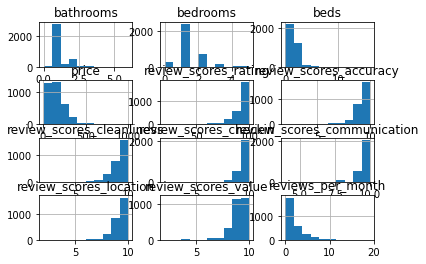

In [7]:
df_num.hist();

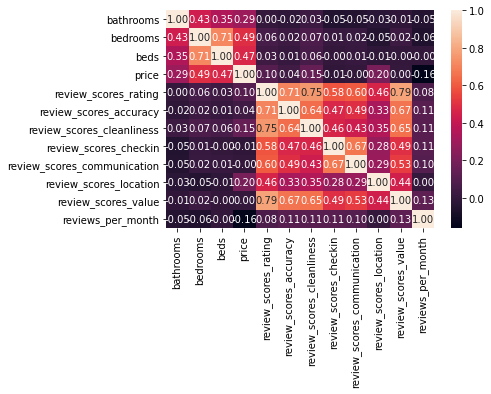

In [8]:
sns.heatmap(df_num.corr(), annot=True, fmt=".2f");

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


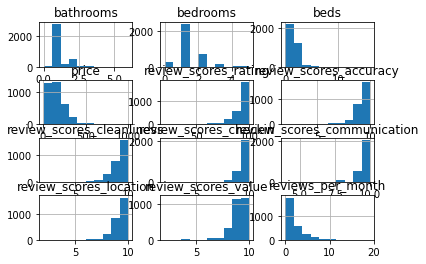

In [16]:
df_num_droppedna = df_num.dropna(subset=['price'],axis=0, how='any')
df_num_droppedna.hist();

In [15]:
df_num.isnull()['price'].mean()

0.0033472803347280333

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


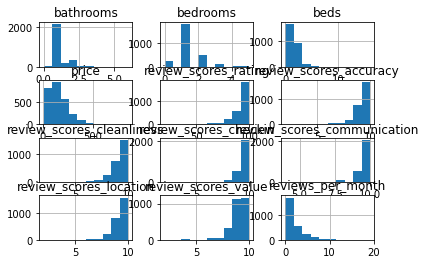

In [20]:
df = df_num.dropna(axis=0)
df.hist();

In [22]:
print(df.shape)
print(df.columns)

(2733, 12)
Index(['bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [28]:
X = df[['review_scores_cleanliness', 'beds', 'review_scores_value']]
y = df['price'] #Create y using the response variable of Salary

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test) # Predictions here using X_2 and lm_2_model
r2_test = r2_score(y_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model

print(len(df))
print(len(X_train))
print(len(X_test))

print(r2_test)


2733
1913
820
0.29978360701940676


In [46]:
#print(df_num.isnull()['price'].mean()) #fraction of null values

new_df = df_num.copy()

print(new_df.isnull()['price'].mean())

fill_mean = lambda col: col.fillna(col.mean())

new_df_2 = new_df.apply(fill_mean, axis=0)

print(new_df_2.isnull()['price'].mean())

0.0033472803347280333
0.0


In [45]:
df_price = fill_mean(new_df['price'])
print(df_price.isnull().mean())

0.0


In [62]:
df_h = df_listings['review_scores_rating']

print(df_h.isnull().mean())

fill_mode = lambda col: col.fillna(col.mode()[0])

df_h_2 = fill_mode(df_h) 

print(df_h_2.isnull().mean())


0.22677824267782426
0.0


In [63]:
df_h_2.head()

0    100.0
1     94.0
2     98.0
3    100.0
4     99.0
Name: review_scores_rating, dtype: float64